In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Uploading the dataset

In [28]:
df=pd.read_csv("C:/Users/kailas/Downloads/Zomato-data-.csv")

In [29]:
print(df.head)

<bound method NDFrame.head of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  


In [30]:
#Data Preprocessing
#1 Converting the Rate values to float by removing the denominator creating a function.

In [31]:
def handle(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
    
df['rate']= df['rate'].apply(handle)

In [32]:
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [33]:
#checking for null value and cleaning the dataset

In [34]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [35]:
#no null value found

Text(0, 0.5, 'Type of Restaurant')

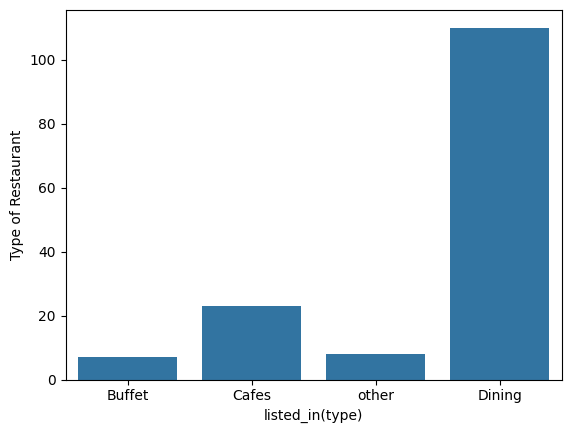

In [53]:
sns.countplot(x=df['listed_in(type)'])
plt.ylabel("Type of Restaurant")

In [38]:
#Most restaurants are under dining

In [41]:
consolidation=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':consolidation})
print(result)

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'Total number of Votes')

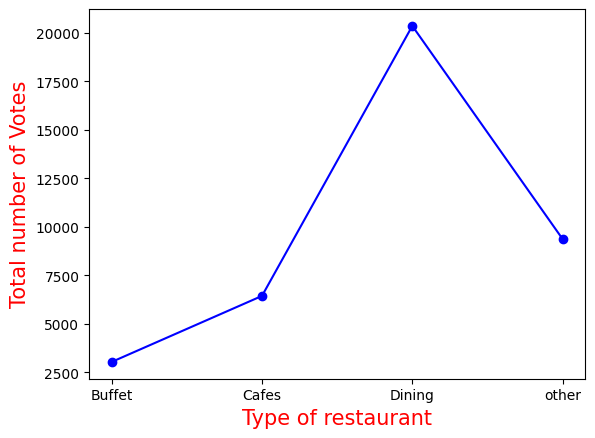

In [44]:
plt.plot(result,c='blue', marker='o')
plt.xlabel('Type of restaurant', c='red', size=15)
plt.ylabel('Total number of Votes', c='red', size=15)

In [47]:
high_rated=df['votes'].max()
highrated_restaurant=df.loc[df['votes']==high_rated,'name']
print('Top Rated Restaurant')
print(highrated_restaurant)

Top Rated Restaurant
38    Empire Restaurant
Name: name, dtype: object


In [48]:
#online ordering availability

C:\Users\kailas\AppData\Local\Temp\ipykernel_12236\576370803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'], palette='Set2')


<Axes: xlabel='online_order', ylabel='count'>

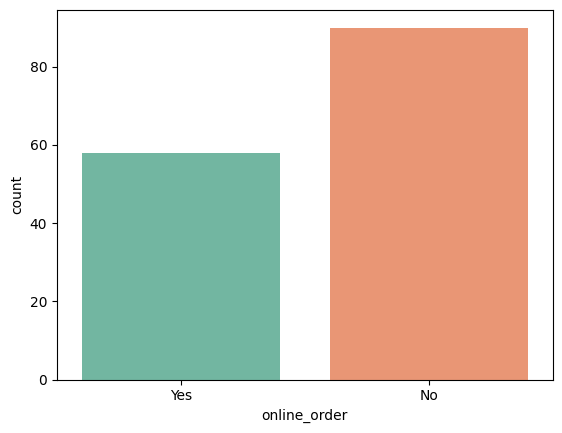

In [58]:
sns.countplot(x=df['online_order'], palette='Set2')

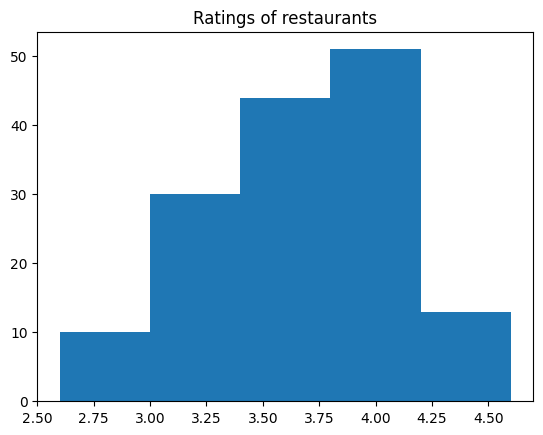

In [69]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings of restaurants')
plt.show()



In [ ]:
#The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

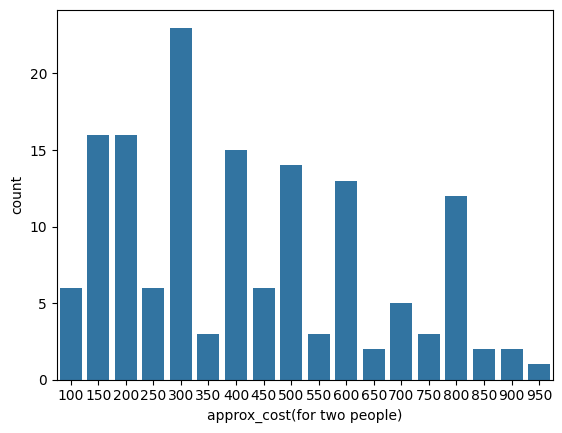

In [70]:
couples=df['approx_cost(for two people)']
sns.countplot(x=couples)

In [ ]:
#most preferable rate for couples is 300

C:\Users\kailas\AppData\Local\Temp\ipykernel_12236\1467639387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate',data=df,palette='Set2')


<Axes: xlabel='online_order', ylabel='rate'>

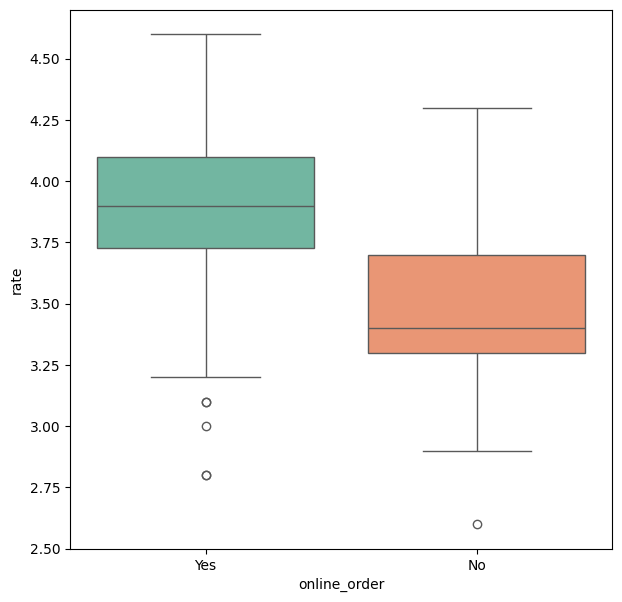

In [75]:
plt.figure(figsize=(7,7))
sns.boxplot(x='online_order', y='rate',data=df,palette='Set2')

In [76]:
#online orders obtained excellent ratings.

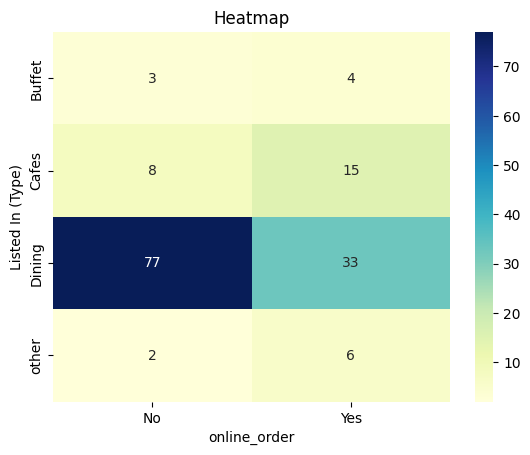

In [79]:
summarising=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(summarising, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.ylabel('Listed In (Type)')
plt.show()

In [ ]:
#clients prefer to place orders in person at restaurants but prefer online ordering at cafes.